In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split



In [19]:
from random import seed
seed(35)

In [2]:
test_set = pd.read_csv('path_to_file', low_memory=False) #Пожалуйста, вставьте путь скачанного файла fashion-mnist_test
train_set = pd.read_csv('path_to_file', low_memory=False) #Пожалуйста, вставьте путь скачанного файла fashion-mnist_train

In [3]:
x_train = train_set.loc[:, train_set.columns != 'label'] 
x_test = test_set.loc[:, test_set.columns != 'label']
y_train = train_set['label']
y_test = test_set['label']
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# масштабируем интенсивности пикселей в диапазон [0, 1]
x_train /= 255
x_test /= 255
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

In [5]:
#Создаем последовательную модель 
model = Sequential()

#Добавляем уровни сети
model.add(Dense(800,input_dim=784,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [6]:
#Компилируем модель
model.compile(loss = 'categorical_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])

In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dropout (Dropout)            (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               410112    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2

In [8]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                            test_size=0.2, random_state=35)

In [11]:
batch_size = 128
epochs = 20

In [16]:
trHistory = model.fit(
  x_train, y_train,
  batch_size=batch_size,
  epochs=epochs,
  verbose=0,
  validation_data=(x_val, y_val)
)

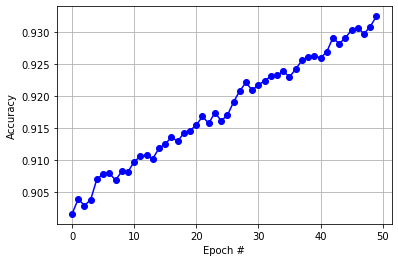

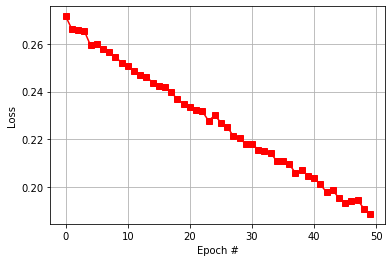

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(trHistory.history['accuracy'], 'b-o')
#plt.plot(trHistory.history['loss'])
plt.grid(True)
plt.xlabel('Epoch #')
plt.ylabel("Accuracy")

plt.figure(2)
plt.plot(trHistory.history['loss'],'r-s')
plt.grid(True)
plt.xlabel('Epoch #')
plt.ylabel("Loss")
plt.show()

In [18]:
log_loss, log_accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', log_accuracy)

Test accuracy: 0.899399995803833


Качество полносвязной нейронной сети выше примерно на 3%, чем логистической регрессии, что связано с большим количеством параметров.